In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import unicodedata
import geopandas as gpd
import get_data
import mapclassify
import contextily as ctx
import numpy as np

In [2]:
import matplotlib.font_manager as fm
# Font Imports
heading_font = fm.FontProperties(fname='/home/ats4i/playfair-display/PlayfairDisplay-Regular.ttf', size=24)
subtitle_font = fm.FontProperties(fname='/home/ats4i/Roboto/Roboto-Regular.ttf', size=16)

In [3]:
DRS=['DRS 09 - Marília',
 'DRS 15 - São José do Rio Preto',
 'DRS 14 - São João da Boa Vista',
 'DRS 06 - Bauru',
 'DRS 16 - Sorocaba',
 'DRS 11 - Presidente Prudente',
 'DRS 05 - Barretos',
 'DRS 13 - Ribeirão Preto',
 'DRS 02 - Araçatuba',
 'DRS 07 - Campinas',
 'DRS 03 - Araraquara',
 'DRS 17 - Taubaté',
 'DRS 10 - Piracicaba',
 'DRS 01 - Grande São Paulo',
 'DRS 12 - Registro',
 'DRS 04 - Baixada Santista',
 'DRS 08 - Franca']

In [4]:
get_data.get_data()

Baixando arquivos brasil.io...


In [5]:
dfSP = pd.read_csv("../regionsSP/data/dados_municipios_SP.csv")
dfSP = dfSP[dfSP.DRS != "Indefinido"]
dfSP


,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,popEst,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,DRS
83,2020-05-19,SP,Adamantina,city,29,1,44,True,35068.0,3500105.0,82.69648,0.0345,DRS 09 - Marília
84,2020-05-18,SP,Adamantina,city,26,1,43,False,35068.0,3500105.0,74.14167,0.0385,DRS 09 - Marília
85,2020-05-17,SP,Adamantina,city,26,1,42,False,35068.0,3500105.0,74.14167,0.0385,DRS 09 - Marília
86,2020-05-16,SP,Adamantina,city,26,1,41,False,35068.0,3500105.0,74.14167,0.0385,DRS 09 - Marília
87,2020-05-15,SP,Adamantina,city,23,0,40,False,35068.0,3500105.0,65.58686,0.0000,DRS 09 - Marília
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14147,2020-05-12,SP,Álvaro de Carvalho,city,1,0,5,False,5227.0,3501400.0,19.13143,0.0000,DRS 09 - Marília
14148,2020-05-11,SP,Álvaro de Carvalho,city,1,0,4,False,5227.0,3501400.0,19.13143,0.0000,DRS 09 - Marília
14149,2020-05-10,SP,Álvaro de Carvalho,city,1,0,3,False,5227.0,3501400.0,19.13143,0.0000,DRS 09 - Marília
14150,2020-05-09,SP,Álvaro de Carvalho,city,1,0,2,False,5227.0,3501400.0,19.13143,0.0000,DRS 09 - Marília


In [6]:
def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

# DRS_Saude_2019.shp

In [7]:
# Set filepath
fp = "/home/ats4i/DRS_Saude_2019/DRS_Saude_2019.shp"

# Read file using gpd.read_file()
dataSaude = gpd.read_file(fp)
dataSaude

,DRS,COD,geometry
0,DRS XVII - Taubaté,17,"MULTIPOLYGON (((-45.52488 -23.85610, -45.52502..."
1,DRS XIII - Ribeirão Preto,1,"POLYGON ((-48.70617 -21.20653, -48.70584 -21.2..."
2,DRS XI - Presidente Prudente,2,"POLYGON ((-50.94517 -22.67485, -50.94530 -22.6..."
3,DRS VII - Campinas,3,"POLYGON ((-47.19115 -23.26960, -47.19073 -23.2..."
4,DRS VIII - Franca,4,"POLYGON ((-47.14462 -20.54093, -47.14419 -20.5..."
5,DRS IX - Marília,5,"POLYGON ((-49.36970 -22.88280, -49.36948 -22.8..."
6,DRS XVI - Sorocaba,6,"POLYGON ((-48.78815 -24.55728, -48.78804 -24.5..."
7,DRS II - Araçatuba,7,"POLYGON ((-50.06110 -21.58360, -50.06106 -21.5..."
8,DRS III - Araraquara,8,"POLYGON ((-48.44626 -22.06980, -48.44627 -22.0..."
9,DRS XII - Registro,9,"POLYGON ((-47.43388 -24.68846, -47.43439 -24.6..."


In [8]:
dataSaude = dataSaude.to_crs(epsg=3857)

In [9]:
def value(r): 
    if (r == 'I'): 
        return 1
    if (r == 'V'): 
        return 5
    if (r == 'X'): 
        return 10
    if (r == 'L'): 
        return 50
    if (r == 'C'): 
        return 100
    if (r == 'D'): 
        return 500
    if (r == 'M'): 
        return 1000
    return -1
  
def romanToDecimal(str): 
    res = 0
    i = 0
  
    while (i < len(str)): 
  
        # Getting value of symbol s[i] 
        s1 = value(str[i]) 
  
        if (i + 1 < len(str)): 
  
            # Getting value of symbol s[i + 1] 
            s2 = value(str[i + 1]) 
  
            # Comparing both values 
            if (s1 >= s2): 
  
                # Value of current symbol is greater 
                # or equal to the next symbol 
                res = res + s1 
                i = i + 1
            else: 
  
                # Value of current symbol is greater 
                # or equal to the next symbol 
                res = res + s2 - s1 
                i = i + 2
        else: 
            res = res + s1 
            i = i + 1
  
    return res 

In [10]:
for i in range(0,len(dataSaude)):
    numeroDR=dataSaude.iloc[i,0].split(' ',)[1]
    nomeDR=dataSaude.iloc[i,0].split(' ',)[3:]
    nomeDR=' '.join(nomeDR)
    decimalDR=romanToDecimal(numeroDR)
    if decimalDR<10:
        decimalDR="0"+str(decimalDR)
    dataSaude.iloc[i,0]="DR "+str(decimalDR)+" - "+nomeDR

In [11]:
dataSaude.DRS=[x.upper() for x in dataSaude.DRS]

for i in range(0,len(dataSaude.index)):
    dataSaude.iloc[i,0] = strip_accents(dataSaude.iloc[i,0])
    
display(dataSaude.head(17))

,DRS,COD,geometry
0,DR 17 - TAUBATE,17,"MULTIPOLYGON (((-5067806.836 -2735883.439, -50..."
1,DR 13 - RIBEIRAO PRETO,1,"POLYGON ((-5421946.071 -2416522.035, -5421908...."
2,DR 11 - PRESIDENTE PRUDENTE,2,"POLYGON ((-5671190.705 -2592743.739, -5671204...."
3,DR 07 - CAMPINAS,3,"POLYGON ((-5253295.218 -2664655.434, -5253247...."
4,DR 08 - FRANCA,4,"POLYGON ((-5248114.811 -2337222.707, -5248067...."
5,DR 09 - MARILIA,5,"POLYGON ((-5495809.622 -2617850.902, -5495784...."
6,DR 16 - SOROCABA,6,"POLYGON ((-5431072.286 -2821463.514, -5431060...."
7,DR 02 - ARACATUBA,7,"POLYGON ((-5572776.263 -2461604.773, -5572771...."
8,DR 03 - ARARAQUARA,8,"POLYGON ((-5393013.119 -2519907.109, -5393014...."
9,DR 12 - REGISTRO,9,"POLYGON ((-5280315.282 -2837527.685, -5280372...."


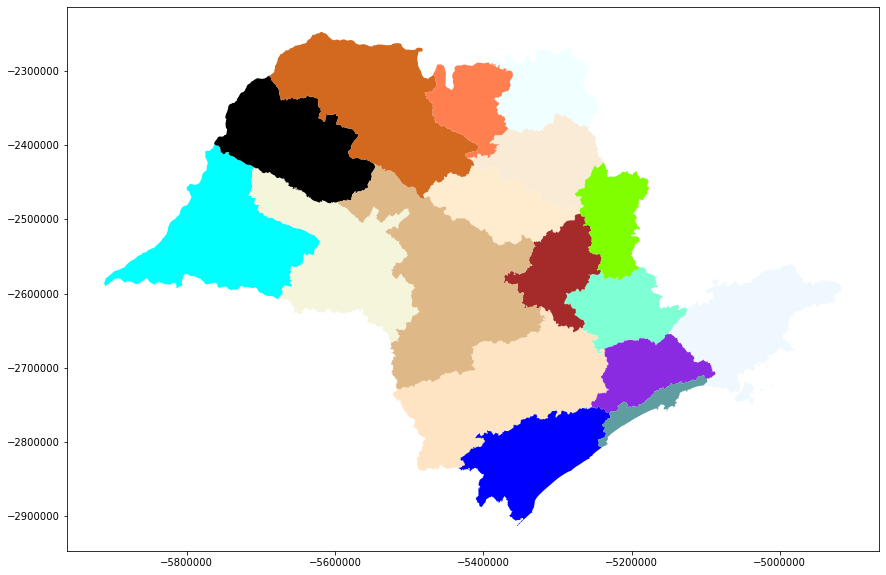

In [12]:
cycol=iter(list(mcolors.CSS4_COLORS.values()))

fig, ax = plt.subplots(figsize=(15, 10))
for i in range(0,len(DRS)):
    plotZ=dataSaude[dataSaude.index==i].plot(ax=ax,color=next(cycol),legend=True)


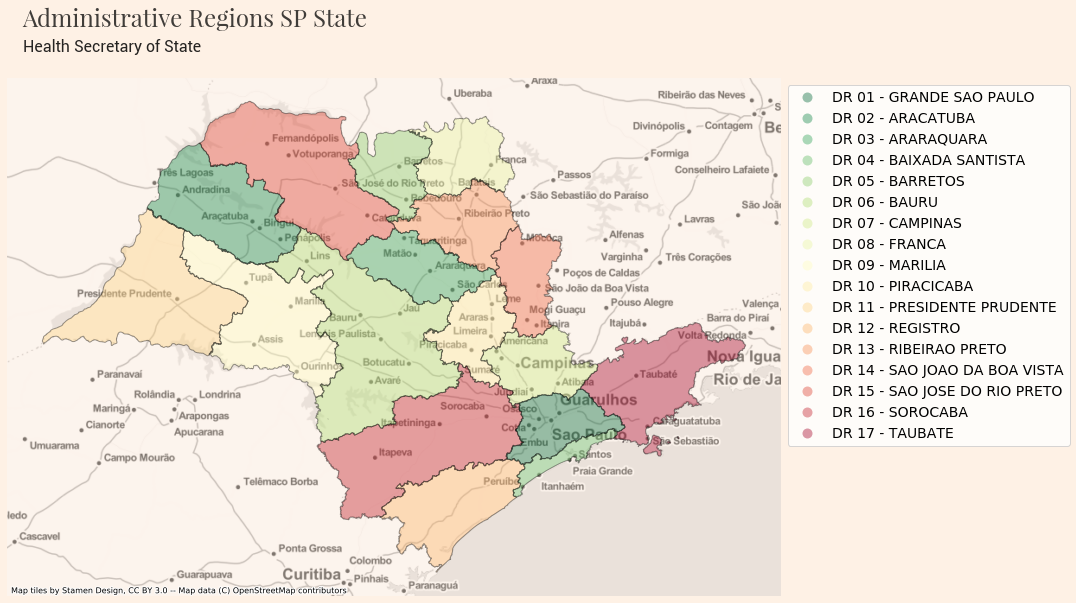

In [13]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

X=dataSaude.plot(column='DRS',alpha=0.4,ax=ax,legend=True,cmap='RdYlGn_r', edgecolor='k', k=10\
                 ,legend_kwds=dict(frameon=True, loc='upper left',bbox_to_anchor=(1, 1)))

# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Administrative Regions SP State",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=0.5)
plt.text(x = 0.02, y = 1.05,
            s = "Health Secretary of State",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

In [14]:
def load_confirmed(start_date, districtRegion):
    dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
    df = pd.read_csv('./data/DRS_confirmados.csv',delimiter=',',parse_dates=True, date_parser=dateparse)
    y=[]
    x=[]
    for i in range(0,len(df.date)):
        y.append(df[districtRegion].values[i])
        x.append(df.date.values[i])
    df2=pd.DataFrame(data=y,index=x,columns=[""])
    df2=df2[start_date:]
    return df2

def load_dead(start_date, districtRegion):
    dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
    df = pd.read_csv('./data/DRS_mortes.csv',delimiter=',',parse_dates=True, date_parser=dateparse)
    y=[]
    x=[]
    for i in range(0,len(df.date)):
        y.append(df[districtRegion].values[i])
        x.append(df.date.values[i])
    df2=pd.DataFrame(data=y,index=x,columns=[""])
    df2=df2[start_date:]
    return df2

In [15]:
def last_nonzero(arr, axis, invalid_val=-1):
    mask = arr!=0
    val = arr.shape[axis] - np.flip(mask, axis=axis).argmax(axis=axis) - 1
    return np.where(mask.any(axis=axis), val, invalid_val)

start_date="2020-03-15"
DRS=sorted(DRS)

infected=[]
dead=[]
for districtRegion in DRS:
    deadX=load_dead(start_date, districtRegion).values
    lastDead=last_nonzero(deadX,0)[0]
    infectedX=load_confirmed(start_date, districtRegion).values
    lastInfected=last_nonzero(infectedX,0)[0]
    lastRecord=min(lastInfected,lastDead)
    infected.append(infectedX[lastRecord][0])
    dead.append(deadX[lastRecord][0])
    
dataSaude=dataSaude.sort_values('DRS')  
# dataSaude=dataSaude.reset_index()
    
dataSaude['infected']=pd.Series(infected,index=dataSaude.index)
dataSaude['dead']=pd.Series(dead,index=dataSaude.index)

In [16]:
display(dataSaude)

,DRS,COD,geometry,infected,dead
10,DR 01 - GRANDE SAO PAULO,10,"POLYGON ((-5132638.821 -2720687.280, -5132630....",52639.0,4367.0
7,DR 02 - ARACATUBA,7,"POLYGON ((-5572776.263 -2461604.773, -5572771....",307.0,18.0
8,DR 03 - ARARAQUARA,8,"POLYGON ((-5393013.119 -2519907.109, -5393014....",299.0,11.0
13,DR 04 - BAIXADA SANTISTA,13,"POLYGON ((-5245466.094 -2797917.815, -5245462....",2986.0,219.0
16,DR 05 - BARRETOS,16,"POLYGON ((-5424438.678 -2411531.544, -5424326....",205.0,11.0
12,DR 06 - BAURU,12,"POLYGON ((-5349736.711 -2660082.579, -5349865....",955.0,52.0
3,DR 07 - CAMPINAS,3,"POLYGON ((-5253295.218 -2664655.434, -5253247....",2760.0,156.0
4,DR 08 - FRANCA,4,"POLYGON ((-5248114.811 -2337222.707, -5248067....",121.0,4.0
5,DR 09 - MARILIA,5,"POLYGON ((-5495809.622 -2617850.902, -5495784....",271.0,16.0
11,DR 10 - PIRACICABA,11,"POLYGON ((-5275279.752 -2630008.929, -5275238....",681.0,37.0


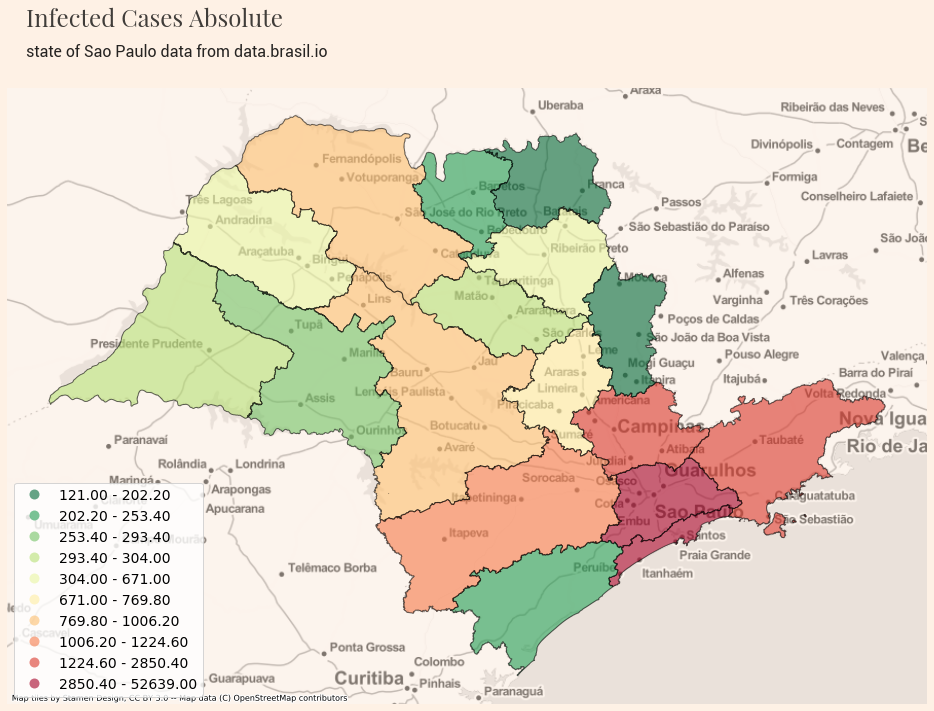

In [17]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

X=dataSaude.plot(column='infected',ax=ax,alpha=0.6, legend=True,cmap='RdYlGn_r',scheme='quantiles', edgecolor='k', k=10\
                 ,legend_kwds=dict(frameon=True, loc='lower left'))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=0.5)

# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Infected Cases Absolute",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "state of Sao Paulo data from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

In [18]:
dfSP=dfSP.sort_values('DRS') 
dfSP=dfSP.reset_index()

df_confirmed = dfSP.groupby(['date','DRS'],as_index = False).sum().pivot('date','DRS').fillna(0)['confirmed']
df_deaths = dfSP.groupby(['date','DRS'],as_index = False).sum().pivot('date','DRS').fillna(0)['deaths']

df_pop = dfSP.groupby(['date','DRS'],as_index = False).sum().pivot('date','DRS').fillna(0)['popEst']
df_pop = df_pop.max().to_frame().T
display(df_pop)

display(df_pop.values[0])

DRS,DRS 01 - Grande São Paulo,DRS 02 - Araçatuba,DRS 03 - Araraquara,DRS 04 - Baixada Santista,DRS 05 - Barretos,DRS 06 - Bauru,DRS 07 - Campinas,DRS 08 - Franca,DRS 09 - Marília,DRS 10 - Piracicaba,DRS 11 - Presidente Prudente,DRS 12 - Registro,DRS 13 - Ribeirão Preto,DRS 14 - São João da Boa Vista,DRS 15 - São José do Rio Preto,DRS 16 - Sorocaba,DRS 17 - Taubaté
0,21702084.0,732230.0,979901.0,1865397.0,426320.0,1698384.0,4663249.0,654673.0,914477.0,1564927.0,685899.0,280291.0,1471641.0,834872.0,1440198.0,2500875.0,2513280.0


array([21702084.,   732230.,   979901.,  1865397.,   426320.,  1698384.,
        4663249.,   654673.,   914477.,  1564927.,   685899.,   280291.,
        1471641.,   834872.,  1440198.,  2500875.,  2513280.])

In [19]:
dataSaude['popEst']=pd.Series(df_pop.values[0],index=dataSaude.index)
dataSaude['infectedPerMi']=pd.Series(infected/df_pop.values[0]*1e6,index=dataSaude.index)
dataSaude['deadPerMi']=pd.Series(dead/df_pop.values[0]*1e6,index=dataSaude.index)
dataSaude['deathRatio']=pd.Series(np.array(dead)/np.array(infected)*100,index=dataSaude.index)

In [20]:
dataSaude

,DRS,COD,geometry,infected,dead,popEst,infectedPerMi,deadPerMi,deathRatio
10,DR 01 - GRANDE SAO PAULO,10,"POLYGON ((-5132638.821 -2720687.280, -5132630....",52639.0,4367.0,21702084.0,2425.527429,201.224915,8.296130
7,DR 02 - ARACATUBA,7,"POLYGON ((-5572776.263 -2461604.773, -5572771....",307.0,18.0,732230.0,419.267170,24.582440,5.863192
8,DR 03 - ARARAQUARA,8,"POLYGON ((-5393013.119 -2519907.109, -5393014....",299.0,11.0,979901.0,305.132865,11.225624,3.678930
13,DR 04 - BAIXADA SANTISTA,13,"POLYGON ((-5245466.094 -2797917.815, -5245462....",2986.0,219.0,1865397.0,1600.731641,117.401282,7.334226
16,DR 05 - BARRETOS,16,"POLYGON ((-5424438.678 -2411531.544, -5424326....",205.0,11.0,426320.0,480.859448,25.802214,5.365854
12,DR 06 - BAURU,12,"POLYGON ((-5349736.711 -2660082.579, -5349865....",955.0,52.0,1698384.0,562.299221,30.617340,5.445026
3,DR 07 - CAMPINAS,3,"POLYGON ((-5253295.218 -2664655.434, -5253247....",2760.0,156.0,4663249.0,591.862026,33.453071,5.652174
4,DR 08 - FRANCA,4,"POLYGON ((-5248114.811 -2337222.707, -5248067....",121.0,4.0,654673.0,184.825096,6.109921,3.305785
5,DR 09 - MARILIA,5,"POLYGON ((-5495809.622 -2617850.902, -5495784....",271.0,16.0,914477.0,296.344249,17.496339,5.904059
11,DR 10 - PIRACICABA,11,"POLYGON ((-5275279.752 -2630008.929, -5275238....",681.0,37.0,1564927.0,435.164068,23.643275,5.433186


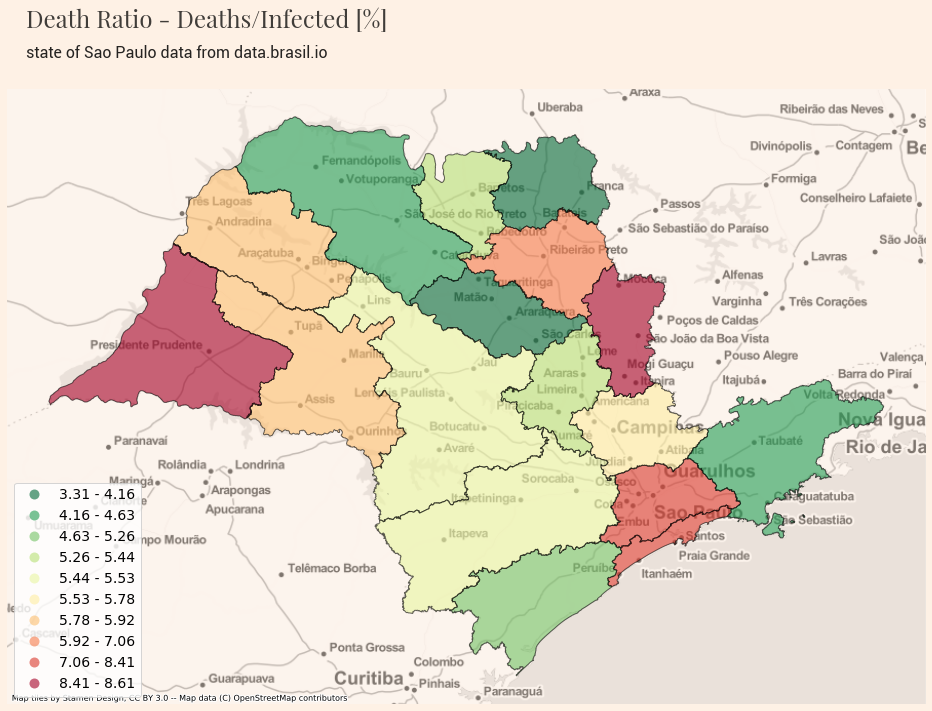

In [21]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

X=dataSaude.plot(column='deathRatio',ax=ax,alpha=0.6,legend=True,cmap='RdYlGn_r',scheme='quantiles', edgecolor='k', k=10\
                 ,legend_kwds=dict(frameon=True, loc='lower left'))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=0.5)


# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Death Ratio - Deaths/Infected [%]",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "state of Sao Paulo data from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

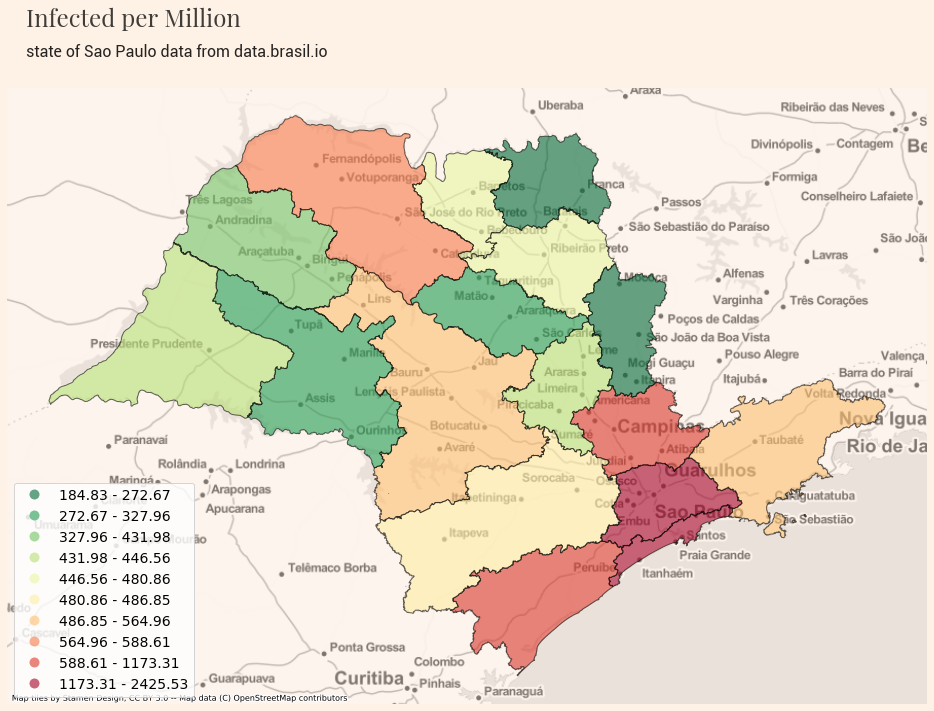

In [22]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

X=dataSaude.plot(column='infectedPerMi',ax=ax,alpha=0.6,legend=True,cmap='RdYlGn_r',scheme='quantiles', edgecolor='k', k=10\
                 ,legend_kwds=dict(frameon=True, loc='lower left'))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=0.5)


# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Infected per Million",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "state of Sao Paulo data from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

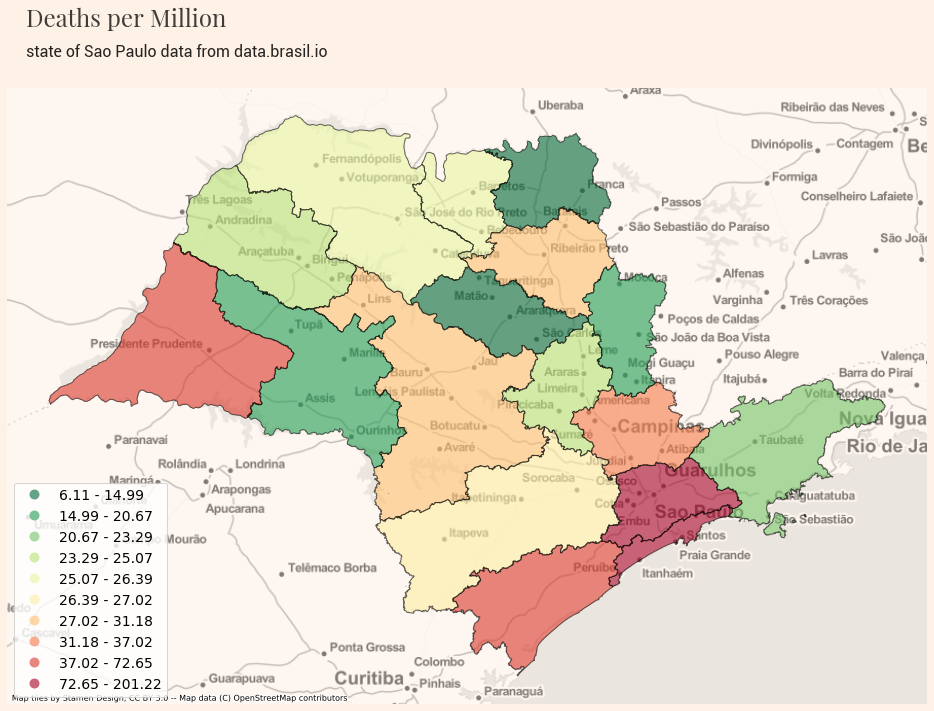

In [23]:
#prepare plotting
color_bg = '#FEF1E5'
# lighter_highlight = '#FAE6E1'
darker_highlight = '#FBEADC'
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
ax.patch.set_facecolor(darker_highlight)
# Hide the left, right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

X=dataSaude.plot(column='deadPerMi',ax=ax,alpha=0.6,legend=True,cmap='RdYlGn_r',scheme='quantiles', edgecolor='k', k=10\
                 ,legend_kwds=dict(frameon=True, loc='lower left'))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=0.5)
ax.set_axis_off()
# Adding a title and a subtitle
plt.text(x = 0.02, y = 1.1, s = "Deaths per Million",
            fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
            fontproperties=heading_font)
plt.text(x = 0.02, y = 1.05,
            s = "state of Sao Paulo data from data.brasil.io",
            fontsize = 26, alpha = .85,transform=ax.transAxes, 
            fontproperties=subtitle_font)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

fig.tight_layout()

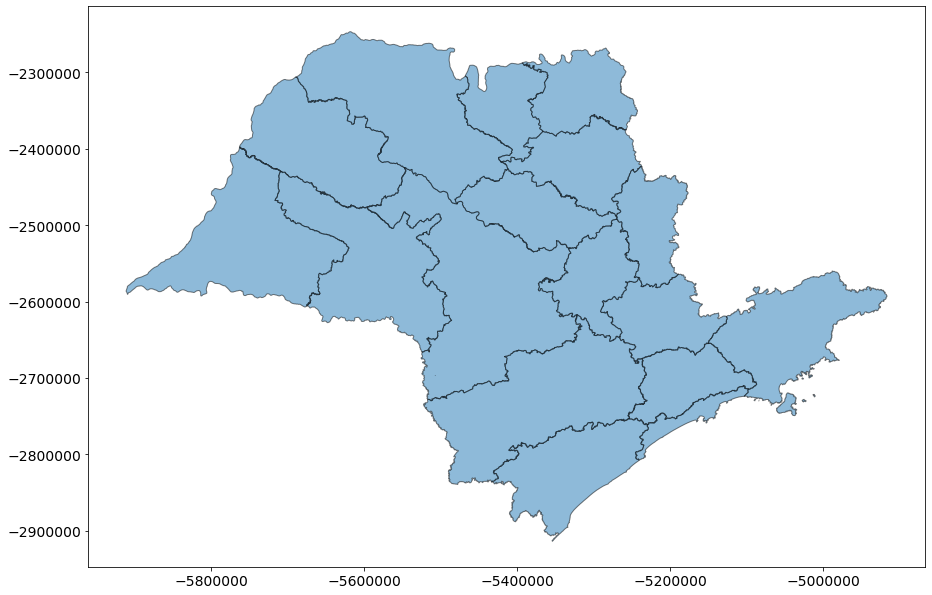

In [24]:
ax = dataSaude.plot(figsize=(15, 20), alpha=0.5, edgecolor='k')

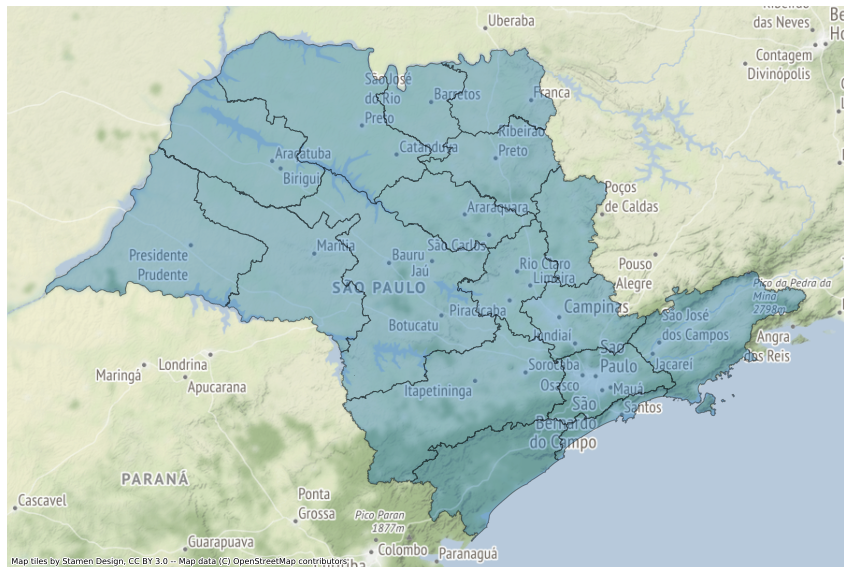

In [25]:
ax = dataSaude.plot(figsize=(15, 20), alpha=0.4, edgecolor='k',k=10)
ctx.add_basemap(ax,alpha=0.7)
ax.set_axis_off()

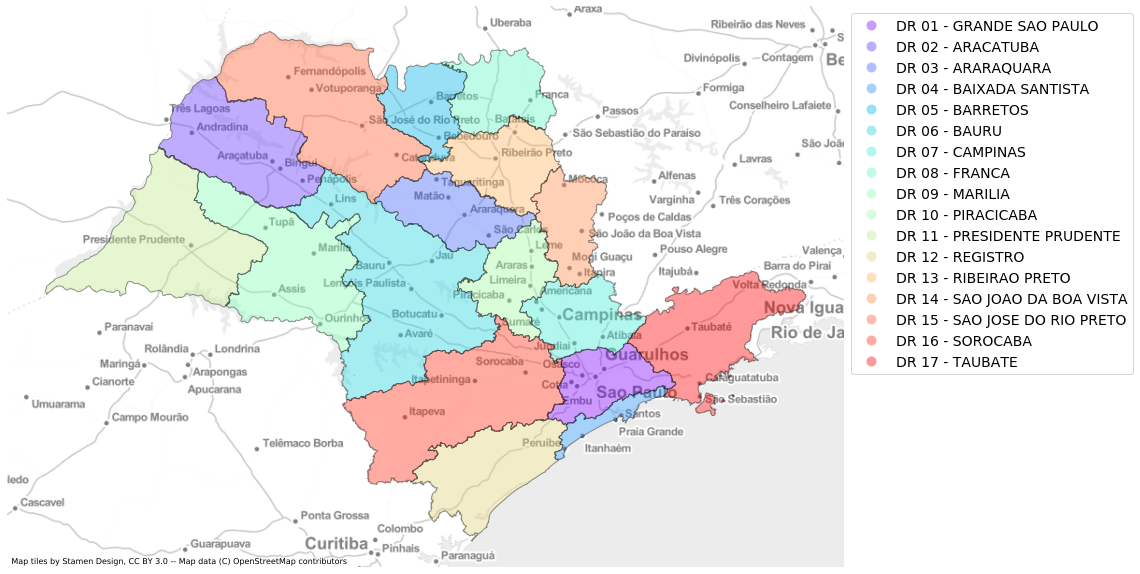

In [26]:
ax = dataSaude.plot(column="DRS", figsize=(15, 20), alpha=0.4, edgecolor='k',k=10, legend=True,cmap='rainbow',\
                    legend_kwds=dict(loc='upper left', bbox_to_anchor=(1, 1)))
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite,alpha=0.5)
ax.set_axis_off()